In [1]:
#importing of required libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time


def give_credits(user,key,hashtags,csv_filepath):
    
    #initilisation of chrome
    driver = webdriver.Chrome(r"C:\Users\admin\Desktop\RHYMcygiene\database\chromedriver.exe")
    #opening a linkedin log in page
    driver.get("https://www.linkedin.com/uas/login?session_redirect=%2Fvoyager%2FloginRedirect%2Ehtml&amp;fromSignIn=true&amp;trk=uno-reg-join-sign-in")
    
    #entring of log in credentials and clicking signin
    username = driver.find_element_by_id("username")
    password = driver.find_element_by_id("password")

    username.send_keys(user)
    password.send_keys(key)

    signin= driver.find_element_by_class_name("login__form_action_container ")
    signin.click()
    driver.get('https://www.linkedin.com/feed/')
    driver.maximize_window() # to maximize window
    
    # creating a customized link for opening bases on hasgtag words
    def hashtag_words( keys=[],*args):
        tags=[]
        temp=''
        for i in range(len(keys)):
            if i==0:
                word= str(keys[i])
                tags.append(word)
            if i>0:
                word='%20'+str(keys[i])
                tags.append(word)
        k=temp.join(tags)
        #final_link='https://www.linkedin.com/search/results/content/?keywords='+k+'&origin=GLOBAL_SEARCH_HEADER'
        final_link='https://www.linkedin.com/search/results/content/?authorCompany=%5B%5D&authorIndustry=%5B%5D&contactInterest=%5B%5D&facetCity=%5B%5D&facetCompany=%5B%5D&facetConnectionOf=%5B%5D&facetCurrentCompany=%5B%5D&facetCurrentFunction=%5B%5D&facetGeoRegion=%5B%5D&facetGroup=%5B%5D&facetGuides=%5B%5D&facetIndustry=%5B%5D&facetNetwork=%5B%5D&facetNonprofitInterest=%5B%5D&facetPastCompany=%5B%5D&facetProfessionalEvent=%5B%5D&facetProfileLanguage=%5B%5D&facetRegion=%5B%5D&facetSchool=%5B%5D&facetSeniority=%5B%5D&facetServiceCategory=%5B%5D&facetState=%5B%5D&groups=%5B%5D&keywords='+k+'&origin=GLOBAL_SEARCH_HEADER&page=1&refresh=false&skillExplicit=%5B%5D&topic=%5B%5D'
        print(final_link)
        return final_link
    
    #opening a page contains all given hashtag words
    driver.get(hashtag_words(keys=hashtags))
    
    # writing a infinte loop to scroll down
    SCROLL_PAUSE_TIME = 1.9

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
            
    # command to fetch all the information contaains in the page       
    content = driver.page_source
    soup = BeautifulSoup(content)    
    
    main_link=soup.find_all('li',class_='search-content__result search-entity ember-view')
    
    linkedin_id=[]
    reference_link=[]
    linkedin_post=[]
    link_post=[]
    
    for i in range(len(main_link)):
        
        
        name=main_link[i].find('span',class_='feed-shared-actor__name t-14 t-black t-bold hoverable-link-text').text
        ref_link=main_link[i].find('a').get('href')
        try:
            post=main_link[i].find('div',class_='feed-shared-text__text-view feed-shared-text-view white-space-pre-wrap break-words ember-view').text
        except AttributeError:
            post='NA'
        k='https://www.linkedin.com/feed/update/'+ main_link[i].find('div').get('data-id') + '/'
        
        
        linkedin_id.append(name)
        reference_link.append(ref_link)
        linkedin_post.append(post)
        link_post.append(k)
        
        
        linkedin_id= [s.strip() for s in linkedin_id]  
        reference_link= [s.strip() for s in reference_link] 
        linkedin_post= [s.strip() for s in linkedin_post] 
        

        linkedin_id= [s.replace('\n','') for s in linkedin_id]  
        reference_link= [s.replace('\n','') for s in reference_link] 
        linkedin_post= [s.replace('\n','') for s in linkedin_post]
        
    #creating a data frame contains name,link and post details
    #creating a data frame contains name,link and post details
    main_data={'Name':linkedin_id,
                'ref_links':reference_link,
                'post':linkedin_post,
                'linkedin_post_link': link_post}
        
    post_df=pd.DataFrame(main_data)
    
    # created post_dataframe is saved to csv file 
    post_df.to_csv(csv_filepath)
    driver.quit()
    return post_df

In [7]:
df= give_credits(user='tammadarajesh@gmail.com',key='123698547',hashtags=['CVE-2019'],csv_filepath='results.csv')

https://www.linkedin.com/search/results/content/?authorCompany=%5B%5D&authorIndustry=%5B%5D&contactInterest=%5B%5D&facetCity=%5B%5D&facetCompany=%5B%5D&facetConnectionOf=%5B%5D&facetCurrentCompany=%5B%5D&facetCurrentFunction=%5B%5D&facetGeoRegion=%5B%5D&facetGroup=%5B%5D&facetGuides=%5B%5D&facetIndustry=%5B%5D&facetNetwork=%5B%5D&facetNonprofitInterest=%5B%5D&facetPastCompany=%5B%5D&facetProfessionalEvent=%5B%5D&facetProfileLanguage=%5B%5D&facetRegion=%5B%5D&facetSchool=%5B%5D&facetSeniority=%5B%5D&facetServiceCategory=%5B%5D&facetState=%5B%5D&groups=%5B%5D&keywords=CVE-2019&origin=GLOBAL_SEARCH_HEADER&page=1&refresh=false&skillExplicit=%5B%5D&topic=%5B%5D


In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\admin\Desktop\Threat_intel_services\code\unsupervised_text_NLP\Project twitter_post_scrapping\APT_details.csv")

In [4]:
df['post'].fillna('NA',inplace=True)
posts=list(df['post'][df['post']!='NA'])

In [5]:
import nltk
import re
from langdetect import detect
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import string
lemmatizer = WordNetLemmatizer() 

In [6]:
result=[]
for i in posts:
    
    post=re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', i, flags=re.MULTILINE)
    post=re.sub(r'(hashtag#)(\w+)','',post)
    
    try:
        lang=detect(post)
        if (len(post)>0) & (lang=='en') :
            post=post.split(' ')
            new=[word for word in post if len(word)>0 ]
            new=' '.join(new)
            result.append(new)
    except:
        pass
    

In [7]:
def remove_stopwords(text): 
    stop_words = (stopwords.words("english")) + list(string.punctuation)
    
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

In [8]:
new_result=[]
for i in result:
    
    a=remove_stopwords(i)
    a=lemmatize_word(' '.join(a))
    a=' '.join(a)
    a=re.sub('\W',' ',a)
    new_result.append(a.strip())
    

In [9]:
new_result

['To state unequivocally Mandiant employ  hack back   techniques part investigation APT1   hack back   incident response practice endorse practice hack back   FireEye denies breaking into laptops of chinese military hackers',
 'Threat Intelligence Chinese Cyber Espionage APT 1 www services pdfs mandiant apt1 report pdf   PDF APT1 ThreatIntel Cyber Espionage',
 'Andrew Thompson Retweeted FireEye',
 'Is The Wolf hide amongst civilians bid audience Not bid auctiontime apt1 theblocknz',
 'DoD spend 30M  China hackable tech Lenovo GoPro others   Quartz  spent 30m on china hackable tech from lenovo gopro others amp    Unit61398 APT1 cyberwar CyberWarfare Comsec InfoSec CyberAware CyberAttack cybersecurity',
 'Chinese Hackers Target Israel   Iron Dome The Diplomat  hackers target israels iron dome    Unit61398 APT1 cyberwar CyberWarfare Comsec InfoSec CyberAware CyberAttack cybersecurity',
 'Why U S  Trade War Against China Should Stay Course  01 01 13 17 00 los angeles 17736 why the u s trad

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(new_result)

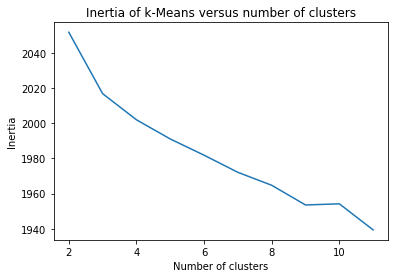

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+2).fit(X).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

In [15]:
modelkmeans = KMeans(n_clusters=9, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X=svd.fit_transform(X) 

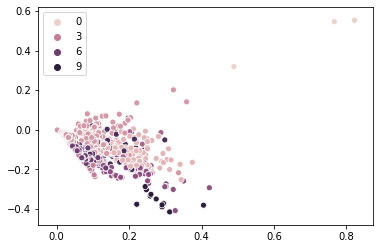

In [18]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=modelkmeans.labels_)

In [19]:
y=modelkmeans.labels_

In [20]:
labels=y

In [21]:
posts=new_result

In [22]:
new_df=pd.DataFrame({'post':posts,'labels':labels})

In [23]:
new_df.to_csv('text_classification_apt.csv')